In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import scipy
import itertools

In [2]:
#file = r"C:\Users\PcLaptop\Documents\GitHub\Climate-and-conflict\Datasets\ACLED_1997-01-01-2023-07-18_Somalia.csv"
file = r"/home/sara/Documenti/GitHub/Climate-and-conflict/Datasets/ACLED_1997-01-01-2023-07-18_Somalia.csv"
df = pd.read_csv(file)

In [3]:
v= df["event_date"]
v= v.values
dt = [datetime.strptime(v[i], "%d %B %Y") for i in range(len(v))]
q=[]

for i in range(len(dt)):
    q.append(datetime.timestamp(dt[i]))
    
df.insert(loc=3, column='date_timestamp', value=q)
df.sort_values("date_timestamp", inplace = True)

In [4]:
df['event_date'] = pd.to_datetime(df['event_date'])
df.set_index('event_date', inplace=True)

In [5]:
fa=df[df['fatalities']>0]
n_conf=df.groupby([pd.Grouper(freq='M')])["event_id_cnty"].count().to_frame()

In [19]:
df.groupby(['admin1',pd.Grouper(freq='M')])["event_id_cnty"].count().to_frame()

event_id_cnty
admin1          event_date               
Awdal           1999-06-30              1
                1999-10-31              1
                2002-09-30              1
                2006-01-31              1
                2006-03-31              1
...                                   ...
Woqooyi Galbeed 2022-10-31              1
                2022-12-31              2
                2023-05-31              1
                2023-06-30              1
                2023-07-31              1

[3781 rows x 1 columns]

In [6]:
aw=df[df['admin1']=='Awdal']

In [7]:
batt=df[df['event_type']=='Violence against civilians']
n_batt=batt.groupby([pd.Grouper(freq='M')])["event_id_cnty"].count().to_frame()
len(batt)

7896

Text(0.5, 0, 'Event date')

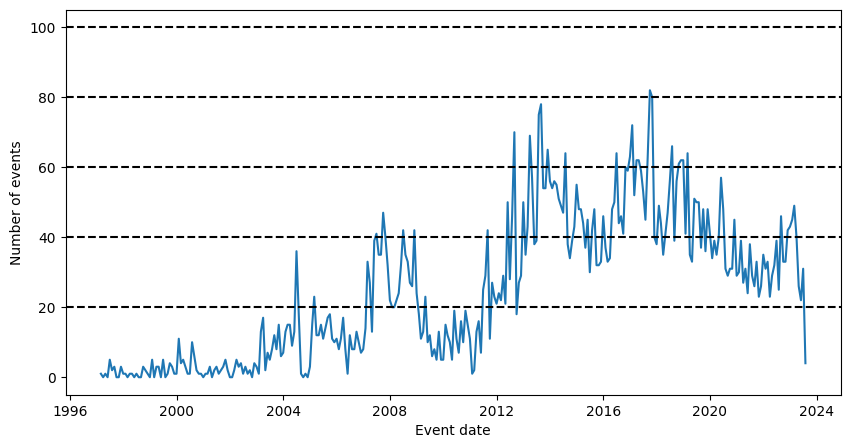

In [10]:
plt.figure(figsize=(10,5))
plt.plot(n_batt)
#plot horizontal line at y=80, 60, 40

plt.axhline(y=20, color='k', linestyle='--')
plt.axhline(y=40, color='k', linestyle='--')
plt.axhline(y=60, color='k', linestyle='--')
plt.axhline(y=80, color='k', linestyle='--')
plt.axhline(y=100, color='k', linestyle='--')
plt.ylabel("Number of events")
plt.xlabel("Event date")

Text(0.5, 0, 'Event date')

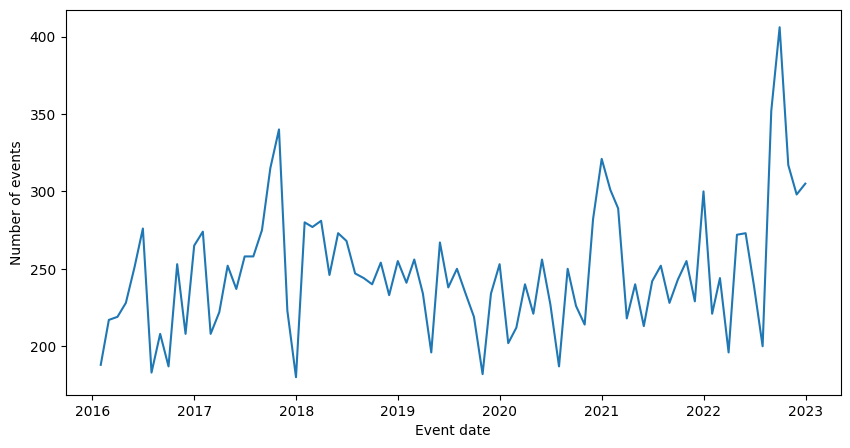

In [12]:
#restrict n_conf to 2016-2022
n_conf=n_conf.loc['2016-01-01':'2022-12-31']

plt.figure(figsize=(10,5))
plt.plot(n_conf)
#plot horizontal line at y=80, 60, 40

plt.ylabel("Number of events")
plt.xlabel("Event date")

In [9]:
fa.groupby(['admin1'])['event_id_cnty'].count()

admin1
Awdal                23
Bakool              508
Banadir            5604
Bari                581
Bay                1297
Galgaduud           685
Gedo                673
Hiraan             1142
Lower Juba         1313
Lower Shabelle     2652
Middle Juba         245
Middle Shabelle     913
Mudug               818
Nugaal              145
Sanaag              125
Sool                241
Togdheer            148
Woqooyi Galbeed      81
Name: event_id_cnty, dtype: int64

In [14]:
aw=df[df['admin1']=='Awdal']
#aw[aw['fatalities']>0]

In [11]:
b=df[df['event_type']=='Battles']
c=df[df['event_type']=='Violence against civilians']
print('total: ', len(df))
print('battles: ', len(b))
print('violence against civilians: ', len(c))

b1=fa[fa['event_type']=='Battles']
c1=fa[fa['event_type']=='Violence against civilians']
print('total, >0 fatalities: ', len(fa))
print('battles + violence against civilians, >0 fatalities: ', len(b1)+len(c1))

total:  41397
battles:  20151
violence against civilians:  7896
total, >0 fatalities:  17194
battles + violence against civilians, >0 fatalities:  13604


In [12]:
reg = df.groupby(["region"])["fatalities"].sum().index.tolist()
viol = df.groupby(["event_type"])["fatalities"].sum().index.tolist()

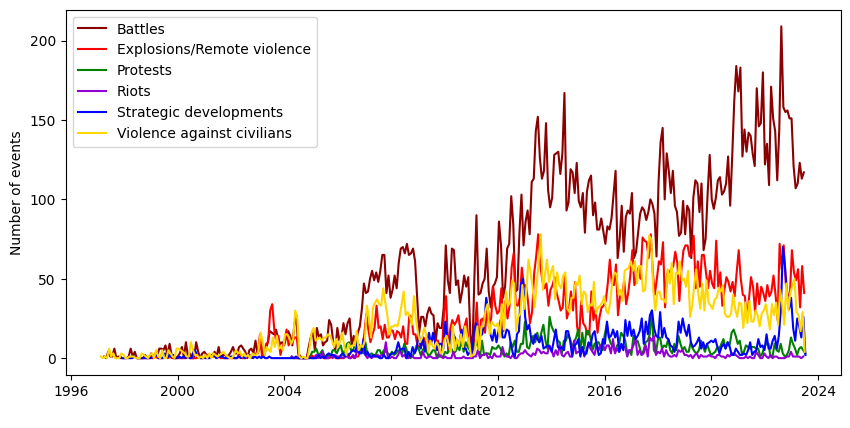

In [13]:
plt.figure(figsize=(10,5))
color_dict = {'Protests': 'green', 'Riots': 'darkviolet', 'Battles': 'darkred','Explosions/Remote violence': 'red', 'Strategic developments': 'blue',
'Violence against civilians': 'gold'}
for region in reg:
    re=df.loc[df["region"] == region]
    for typ in viol:
        pro = re.loc[re["event_type"] == typ]["fatalities"]
        g_pro = pro.groupby(pd.Grouper(freq='40320min')).count()
        if g_pro.empty == False:              
            plt.plot(g_pro, label=typ, color=color_dict[typ])
    plt.ylabel("Number of events")
    plt.xlabel("Event date")
    plt.legend()
    plt.subplots_adjust(bottom=0.15)
    #plt.savefig(r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\ISI\Plot timeline regions\timeline_%s" %region, dpi=700)
    plt.show()